# LLMs with structured data


## 使用结构化数据的语言模型：探索 Chinook 数据库

本教程将深入探讨如何使用大型语言模型（LLMs）处理结构化数据，并以 Chinook 数据库为例，演示如何构建一个可以回答数据库相关问题的智能代理。

### 1.  LLMs 与结构化数据

**挑战：**

大型语言模型（LLMs）在自然语言处理方面表现出色，但它们本身并不擅长处理结构化数据，例如存储在数据库中的表格数据。LLMs 缺乏直接查询数据库、理解数据库 schema 或执行复杂数据操作的能力。

**解决方案：**

为了使 LLMs 能够利用结构化数据，我们需要将它们与外部工具连接起来，这些工具可以充当 LLMs 与数据库之间的桥梁。LangChain 就是这样一个强大的框架，它提供了必要的工具和抽象，可以轻松地将 LLMs 与各种数据源集成。

### 2.  探索 Chinook 数据库

在本教程中，我们将使用 Chinook 数据库作为示例数据集。Chinook 数据库是一个开源的 SQLite 数据库，包含音乐商店的数据，例如艺术家、专辑、客户和发票。 

**数据库结构：**

Chinook 数据库由以下几个表组成：

- **Artists:** 存储艺术家信息（艺术家 ID，姓名）。
- **Albums:** 存储专辑信息（专辑 ID，标题，艺术家 ID）。
- **Tracks:** 存储曲目信息（曲目 ID，名称，专辑 ID，媒体类型 ID，类型 ID，作曲家，时长，大小，单价）。
- **Customers:** 存储客户信息（客户 ID，姓氏，名字，公司，地址，城市，州/省，国家，邮政编码，电话，传真，电子邮件，支持代表 ID）。
- **Invoices:** 存储发票信息（发票 ID，客户 ID，发票日期，账单地址，账单城市，账单州，账单国家，账单邮政编码，总计）。
- **InvoiceItems:** 存储发票项目信息（发票项目 ID，发票 ID，曲目 ID，单价，数量）。

**下载数据库：**

你可以从以下网址下载 Chinook 数据库：[Chinook Database](https://database.guide/2-sample-databases-sqlite/)

### 3. 开始使用 LLM

在本教程中，我们将使用 Google 的 Gemini Pro 模型。


### 4.  提示工程

**提示工程的重要性：**

提示工程是与 LLM 交互的关键部分。 为了获得最佳结果，我们需要精心设计提示，以便 LLM 理解我们的意图并生成我们期望的输出。

**结构化提示：**

在本教程中，我们将使用结构化提示来引导 LLM 的行为。结构化提示包括以下部分：

- **前缀（Prefix）：** 提供上下文信息，例如 LLM 的角色和可用的工具。
- **格式说明（Format Instructions）：**  定义 LLM 与用户交互的预期格式，包括问题、思考过程、行动、观察和最终答案。
- **后缀（Suffix）：**  提供额外的说明或引导，例如开始指令或初始思考。

### 5.  添加工具

**LangChain 工具：**

LangChain 提供了各种工具，可以扩展 LLM 的功能，使它们能够访问和处理外部数据源。

**SQLDatabaseChain 工具：**

在本教程中，我们将使用 `SQLDatabaseChain` 工具来查询 Chinook 数据库。 该工具允许 LLM 执行 SQL 查询并检索结果。

### 6. 初始化代理

**LangChain 代理：**

LangChain 代理是一个可以访问多个工具并使用它们来完成任务的实体。

**初始化代理：**

```python
# 初始化代理
agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    agent_kwargs={
        "prefix": PREFIX,
        "format_instructions": FORMAT_INSTRUCTIONS,
        "suffix": SUFFIX,
    },
)
```

-  `tools`: 传递我们创建的工具列表。
-  `llm`: 传递我们初始化的 LLM。
-  `agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION`: 指定代理类型为结构化聊天零样本反应描述。
-  `verbose=True`: 启用详细输出，以便查看代理的思考过程和操作。
-  `agent_kwargs`: 传递额外的参数，例如我们定义的提示词模板。

### 7.  运行代理

```python
agent_executor.run('每个音乐类型的歌曲总数和平均长度分别是多少？')
```

### 8.  添加更多工具

您可以通过添加更多工具来进一步扩展代理的功能，例如：

- **PythonREPLTool:**  允许代理执行 Python 代码，例如进行计算、数据处理或调用其他 Python 库。
- **WikipediaTool:**  允许代理访问 Wikipedia 信息，例如查找实体、获取定义或检索相关页面。
- **WolframAlphaTool:**  允许代理执行计算和查询 Wolfram Alpha 知识库，例如解决数学问题、获取科学数据或检索事实信息。

### 结论

在本教程中，我们深入探讨了如何使用 LangChain 框架将 LLMs 与结构化数据（以 Chinook 数据库为例）集成，并构建了一个可以回答数据库相关问题的智能代理。 通过添加更多工具和优化提示，您可以进一步增强代理的功能，使其能够处理更广泛的任务。 


## Inspecting the Chinook Database

从这里了解 [Chinook Database](https://database.guide/2-sample-databases-sqlite/)

In [118]:
import sqlite3
import pandas as pd
## creating a connection
database = 'chinook.db'
conn = sqlite3.connect(database)

In [19]:
## importing tables 
tables = pd.read_sql("""SELECT name, type
                        FROM sqlite_master
                        WHERE type IN ("table", "view");""", conn)

tables

,name,type
0,Album,table
1,Artist,table
2,Customer,table
3,Employee,table
4,Genre,table
5,Invoice,table
6,InvoiceLine,table
7,MediaType,table
8,Playlist,table
9,PlaylistTrack,table


In [27]:
album_primary_keys= pd.read_sql("""PRAGMA table_info(Track);""",conn)
album_primary_keys

,cid,name,type,notnull,dflt_value,pk
0,0,TrackId,INTEGER,1,None,1
1,1,Name,NVARCHAR(200),1,None,0
2,2,AlbumId,INTEGER,0,None,0
3,3,MediaTypeId,INTEGER,1,None,0
4,4,GenreId,INTEGER,0,None,0
5,5,Composer,NVARCHAR(220),0,None,0
6,6,Milliseconds,INTEGER,1,None,0
7,7,Bytes,INTEGER,0,None,0
8,8,UnitPrice,"NUMERIC(10,2)",1,None,0


In [25]:
pd.read_sql("""
SELECT c.country AS Country, SUM(i.total) AS Sales
FROM Customer c
JOIN invoice i ON c.CustomerId = i.CustomerId
GROUP BY Country
ORDER BY Sales DESC
LIMIT 5;

""", conn)

,Country,Sales
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48


Matplotlib is building the font cache; this may take a moment.


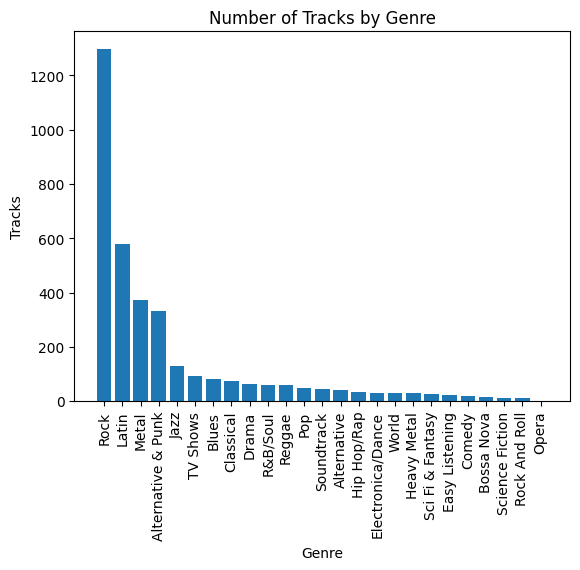

In [28]:

import matplotlib.pyplot as plt

# Define the SQL query
sql = """
SELECT g.Name AS Genre, COUNT(t.TrackId) AS Tracks
FROM Genre g
JOIN track t ON g.GenreId = t.GenreId
GROUP BY Genre
ORDER BY Tracks DESC;
"""

# Read the data into a dataframe
data = pd.read_sql(sql, conn)

# Plot the data as a bar chart
plt.bar(data.Genre, data.Tracks)
plt.title("Number of Tracks by Genre")
plt.xlabel("Genre")
plt.ylabel("Tracks")
plt.xticks(rotation=90)
plt.show()


## Start using LLMs

In [29]:
import os
os.environ["GOOGLE_API_KEY"]

from langchain_google_genai import GoogleGenerativeAI
# 初始化语言模型，使用 Google 的 gemini-1.5-pro 模型，并将 temperature 设置为 0
llm = GoogleGenerativeAI(model="gemini-1.5-pro", temperature=0)


# from langchain_google_genai import ChatGoogleGenerativeAI
# # 初始化聊天型语言模型，使用 Google 的 gemini-1.5-pro 模型
# model = ChatGoogleGenerativeAI(
#     model="gemini-1.5-pro",
#     temperature=0,          # 控制生成文本的随机性，0 表示最确定性
#     max_tokens=None,       # 生成的最大 token 数量，None 表示没有限制
#     timeout=None,          # 请求超时时间，None 表示没有限制
#     max_retries=2,         # 最大重试次数
#     # 其他参数...
# )

# messages = [
#     (
#         "system",
#         "你是翻译专家，擅长将英语翻译成中文。请将用户的英语语句翻译成中文。",
#     ),
#     ("human", "I love playing RPG games."),
# ]
# chat = llm.invoke(messages)
# chat

In [31]:
from langchain.agents import create_sql_agent
from langchain.agents.agent_toolkits import SQLDatabaseToolkit
from langchain.sql_database import SQLDatabase

from langchain.agents import AgentExecutor
from langchain.agents.agent_types import AgentType


db = SQLDatabase.from_uri('sqlite:///chinook.db')

toolkit = SQLDatabaseToolkit(db=db, llm=llm)
agent_executor = create_sql_agent(
    llm=llm,
    toolkit=toolkit,
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)

# agent_executor.run("Describe the playlisttrack table")
agent_executor.run("请描述一下playlisttrack表")



> Entering new SQL Agent Executor chain...
Thought: I need to see the schema for the 'playlisttrack' table to describe it. To do that, I first need to confirm if 'playlisttrack' is a valid table name in the database. 
Action: sql_db_list_tables
Action Input: Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, TrackThought: The table 'playlisttrack' exists in the database. I can proceed to get its schema.
Action: sql_db_schema
Action Input: PlaylistTrack
CREATE TABLE "PlaylistTrack" (
	"PlaylistId" INTEGER NOT NULL, 
	"TrackId" INTEGER NOT NULL, 
	PRIMARY KEY ("PlaylistId", "TrackId"), 
	FOREIGN KEY("TrackId") REFERENCES "Track" ("TrackId"), 
	FOREIGN KEY("PlaylistId") REFERENCES "Playlist" ("PlaylistId")
)

/*
3 rows from PlaylistTrack table:
PlaylistId	TrackId
1	3402
1	3389
1	3390
*/Thought: I now have the schema and some sample data for the 'playlisttrack' table.
Final Answer: The "PlaylistTrack" table represents a join table used to 

'The "PlaylistTrack" table represents a join table used to connect playlists and tracks. It has a composite primary key consisting of "PlaylistId" and "TrackId", ensuring a unique combination of playlist and track. \n\nThe "PlaylistId" acts as a foreign key referencing the "Playlist" table, and the "TrackId" is a foreign key referencing the "Track" table. This structure dictates that each record in this table represents a single track within a specific playlist.'

In [34]:
tools = [tool for tool in toolkit.get_tools()]
print(tools)

[QuerySQLDataBaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x128bc9d50>), InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x128bc9d50>), ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x128bc9d50>), QuerySQLCheckerTool(description='Use this tool to double check if your que

In [36]:
agent_executor.run("排名前五的国家/地区的销售额分别是多少？")



> Entering new SQL Agent Executor chain...
Thought: 我需要查询数据库中所有国家/地区的销售额，并按照销售额降序排列，取前五名。 
Action: sql_db_list_tables
Action Input: Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, TrackThought: 我需要查询数据库中所有国家/地区的销售额，并按照销售额降序排列，取前五名。 Invoice 表格应该包含我需要的信息：国家/地区和发票金额。
Action: sql_db_schema
Action Input: Invoice
CREATE TABLE "Invoice" (
	"InvoiceId" INTEGER NOT NULL, 
	"CustomerId" INTEGER NOT NULL, 
	"InvoiceDate" DATETIME NOT NULL, 
	"BillingAddress" NVARCHAR(70), 
	"BillingCity" NVARCHAR(40), 
	"BillingState" NVARCHAR(40), 
	"BillingCountry" NVARCHAR(40), 
	"BillingPostalCode" NVARCHAR(10), 
	"Total" NUMERIC(10, 2) NOT NULL, 
	PRIMARY KEY ("InvoiceId"), 
	FOREIGN KEY("CustomerId") REFERENCES "Customer" ("CustomerId")
)

/*
3 rows from Invoice table:
InvoiceId	CustomerId	InvoiceDate	BillingAddress	BillingCity	BillingState	BillingCountry	BillingPostalCode	Total
1	2	2021-01-01 00:00:00	Theodor-Heuss-Straße 34	Stuttgart	None	Germany	70174

'排名前五的国家/地区分别是：美国 (523.06), 加拿大 (303.96), 法国 (195.1), 巴西 (190.1), 德国 (156.48)。'

In [37]:
# 创建一个 SQL 代理执行器
agent_executor = create_sql_agent(
    llm=llm,             # 使用的语言模型
    toolkit=toolkit,       # 工具集
    verbose=True,         # 是否打印详细信息
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,  # 代理类型：零样本反应描述
)

# 执行查询：获取每个音乐类型的歌曲总数和平均长度
agent_executor.run('每个音乐类型的歌曲总数和平均长度分别是多少？')



> Entering new SQL Agent Executor chain...
Thought: 首先，我需要知道数据库中有哪些表格和字段，才能构建SQL查询语句。
Action: sql_db_list_tables
Action Input: Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, TrackThought: 我看到了 "Track" 和 "Genre" 表，这两个表包含我需要的信息。我需要查看这两个表的结构。
Action: sql_db_schema
Action Input: Track, Genre
CREATE TABLE "Genre" (
	"GenreId" INTEGER NOT NULL, 
	"Name" NVARCHAR(120), 
	PRIMARY KEY ("GenreId")
)

/*
3 rows from Genre table:
GenreId	Name
1	Rock
2	Jazz
3	Metal
*/


CREATE TABLE "Track" (
	"TrackId" INTEGER NOT NULL, 
	"Name" NVARCHAR(200) NOT NULL, 
	"AlbumId" INTEGER, 
	"MediaTypeId" INTEGER NOT NULL, 
	"GenreId" INTEGER, 
	"Composer" NVARCHAR(220), 
	"Milliseconds" INTEGER NOT NULL, 
	"Bytes" INTEGER, 
	"UnitPrice" NUMERIC(10, 2) NOT NULL, 
	PRIMARY KEY ("TrackId"), 
	FOREIGN KEY("MediaTypeId") REFERENCES "MediaType" ("MediaTypeId"), 
	FOREIGN KEY("GenreId") REFERENCES "Genre" ("GenreId"), 
	FOREIGN KEY("AlbumId") REFERENCES "Album" ("Al

'数据显示，Rock音乐类型的歌曲数量最多，共1297首，平均长度为283.91秒；Jazz音乐类型位居第二，共130首，平均长度为291.76秒；Metal音乐类型位居第三，共374首，平均长度为309.75秒。Latin音乐类型的歌曲数量也比较多，达到了579首，但平均长度较短，只有232.86秒。'

## Prompt engineering

In [94]:
create_sql_agent?

Signature:
create_sql_agent(
    llm: 'BaseLanguageModel',
    toolkit: 'Optional[SQLDatabaseToolkit]' = None,
    agent_type: "Optional[Union[AgentType, Literal['openai-tools']]]" = None,
    callback_manager: 'Optional[BaseCallbackManager]' = None,
    prefix: 'Optional[str]' = None,
    suffix: 'Optional[str]' = None,
    format_instructions: 'Optional[str]' = None,
    input_variables: 'Optional[List[str]]' = None,
    top_k: 'int' = 10,
    max_iterations: 'Optional[int]' = 15,
    max_execution_time: 'Optional[float]' = None,
    early_stopping_method: 'str' = 'force',
    verbose: 'bool' = False,
    agent_executor_kwargs: 'Optional[Dict[str, Any]]' = None,
    extra_tools: 'Sequence[BaseTool]' = (),
    *,
    db: 'Optional[SQLDatabase]' = None,
    prompt: 'Optional[BasePromptTemplate]' = None,
    **kwargs: 'Any',
) -> 'AgentExecutor'
Docstring:
Construct a SQL agent from an LLM and toolkit or database.

Args:
    llm: Language model to use for the agent.
    toolkit: SQLData

In [95]:
prompt_prefix = """ 
##Instructions:
You are an agent designed to interact with a SQL database.
Given an input question, create a syntactically correct {dialect} query to run, then look at the results of the query and return the answer.
Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most {top_k} results.
You can order the results by a relevant column to return the most interesting examples in the database.
Never query for all the columns from a specific table, only ask for the relevant columns given the question.
You have access to tools for interacting with the database.
Only use the below tools. Only use the information returned by the below tools to construct your final answer.
You MUST double check your query before executing it. If you get an error while executing a query, rewrite the query and try again.
As part of your final answer, ALWAYS include an explanation of how to got to the final answer, including the SQL query you run. Include the explanation and the SQL query in the section that starts with "Explanation:".

DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database.

If the question does not seem related to the database, just return "I don\'t know" as the answer.

##Tools:

"""

prompt_format_instructions = """ 
Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question.

Explanation:

<===Beging of an Example of Explanation:

I joined the Invoice and Customer tables on the customerId column, which is the common key between them. This will allowed me to access the Total and Country columns from both tables. Then I grouped the records by the country column and calculate the sum of the Total column for each country, ordered them in descending order and limited the SELECT to the top 5.

```sql
SELECT c.country AS Country, SUM(i.total) AS Sales
FROM Customer c
JOIN Invoice i ON c.customerId = i.customerId
GROUP BY Country
ORDER BY Sales DESC
LIMIT 5;
```

===>End of an Example of Explanation
"""

In [96]:
# 创建一个 SQL 代理执行器
agent_executor = create_sql_agent(
    prefix=prompt_prefix,           # 提示词前缀
    format_instructions=prompt_format_instructions,  # 格式化说明
    llm=llm,                        # 使用的语言模型
    toolkit=toolkit,                 # 工具集
    verbose=True,                   # 是否打印详细信息
    top_k=10                       # 返回结果的前 k 个
)

# 执行查询：获取销量排名前五的专辑及其艺术家
result = agent_executor.run("销量排名前五的专辑及其艺术家分别是哪些？")



> Entering new SQL Agent Executor chain...
Thought: I need to find the top 5 albums by sales. This likely involves an 'Album' table and maybe an 'InvoiceLine' table to get the sales data. I should start by listing the available tables.

Action: sql_db_list_tables
Action Input: Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, TrackThought: I see 'Album', 'Artist', and 'InvoiceLine'.  These tables likely hold the information I need. I should examine their schemas.

Action: sql_db_schema
Action Input: Album, Artist, InvoiceLine
CREATE TABLE "Album" (
	"AlbumId" INTEGER NOT NULL, 
	"Title" NVARCHAR(160) NOT NULL, 
	"ArtistId" INTEGER NOT NULL, 
	PRIMARY KEY ("AlbumId"), 
	FOREIGN KEY("ArtistId") REFERENCES "Artist" ("ArtistId")
)

/*
3 rows from Album table:
AlbumId	Title	ArtistId
1	For Those About To Rock We Salute You	1
2	Balls to the Wall	2
3	Restless and Wild	2
*/


CREATE TABLE "Artist" (
	"ArtistId" INTEGER NOT NULL, 
	"Name" NVARC

In [97]:
from IPython.display import Markdown, HTML, display 
def printmd(string):
    display(Markdown(string))
print(result)

The top 5 albums by sales are:

1. "Battlestar Galactica (Classic), Season 1" by Battlestar Galactica (Classic)
2. "The Office, Season 3" by The Office 
3. "Minha Historia" by Chico Buarque
4. "Heroes, Season 1" by Heroes
5. "Lost, Season 2" by Lost


## Adding further tools

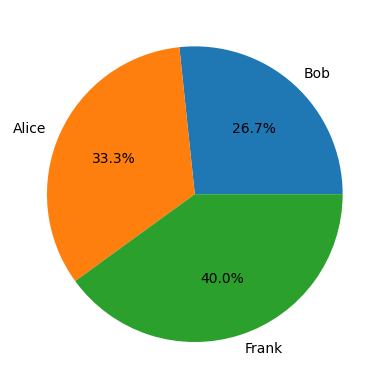

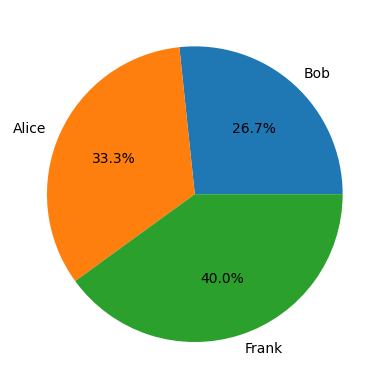

In [100]:
from langchain.agents import AgentType, initialize_agent  # 从 langchain 库导入相关模块
from langchain.agents.agent_types import AgentType 
from langchain_core.tools import Tool
from langchain_experimental.utilities import PythonREPL

# 创建一个 PythonREPL 对象
python_repl = PythonREPL()

# 创建一个名为 "python_repl" 的工具
repl_tool = Tool(
    name="python_repl",  # 工具名称
    description="一个 Python 交互式解释器。可以使用它来执行 Python 命令。输入必须是有效的 Python 命令。如果要查看某个值的输出，可以使用 `print(...)` 将其打印出来。",  # 工具描述
    func=python_repl.run,  # 工具函数：使用 python_repl.run 来执行代码
)

# 创建一个包含 PythonREPL 工具的列表
tools = [repl_tool]

# 初始化一个代理
agent = initialize_agent(
    tools=tools,                                   # 代理可使用的工具列表
    llm=llm,                                      # 使用的语言模型
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,  # 代理类型：零样本反应描述
    verbose=False                                  # 是否打印详细信息
)

# 运行代理并执行以下任务：
result = agent.invoke('创建一个关于 Bob、Alice 和 Frank 收入的示例 DataFrame。然后返回一个 matplotlib 饼图，显示他们的三份收入。只返回图表作为输出。')

In [101]:
from langchain.tools.file_management import (
    ReadFileTool,
    CopyFileTool,
    DeleteFileTool,
    MoveFileTool,
    WriteFileTool,
    ListDirectoryTool,
)
from langchain.agents.agent_toolkits import FileManagementToolkit

working_directory  = os.getcwd()

tools = FileManagementToolkit(
    root_dir=str(working_directory),
    selected_tools=["read_file", "write_file", "list_directory"],).get_tools()
tools.append(
    repl_tool)


tools.extend(SQLDatabaseToolkit(db=db, llm=llm).get_tools())
tools

[ReadFileTool(root_dir='/Users/bytedance/Documents/GitHub/Building-LLM-powered-Solutions'),
 WriteFileTool(root_dir='/Users/bytedance/Documents/GitHub/Building-LLM-powered-Solutions'),
 ListDirectoryTool(root_dir='/Users/bytedance/Documents/GitHub/Building-LLM-powered-Solutions'),
 Tool(name='python_repl', description='一个 Python 交互式解释器。可以使用它来执行 Python 命令。输入必须是有效的 Python 命令。如果要查看某个值的输出，可以使用 `print(...)` 将其打印出来。', func=<bound method PythonREPL.run of PythonREPL(globals={'__builtins__': {'__name__': 'builtins', '__doc__': "Built-in functions, types, exceptions, and other objects.\n\nThis module provides direct access to all 'built-in'\nidentifiers of Python; for example, builtins.len is\nthe full name for the built-in function len().\n\nThis module is not normally accessed explicitly by most\napplications, but can be useful in modules that provide\nobjects with the same name as a built-in value, but in\nwhich the built-in of that name is also needed.", '__package__': '', '__loader__': <cl

In [102]:
[tool for tool in tools]

[ReadFileTool(root_dir='/Users/bytedance/Documents/GitHub/Building-LLM-powered-Solutions'),
 WriteFileTool(root_dir='/Users/bytedance/Documents/GitHub/Building-LLM-powered-Solutions'),
 ListDirectoryTool(root_dir='/Users/bytedance/Documents/GitHub/Building-LLM-powered-Solutions'),
 Tool(name='python_repl', description='一个 Python 交互式解释器。可以使用它来执行 Python 命令。输入必须是有效的 Python 命令。如果要查看某个值的输出，可以使用 `print(...)` 将其打印出来。', func=<bound method PythonREPL.run of PythonREPL(globals={'__builtins__': {'__name__': 'builtins', '__doc__': "Built-in functions, types, exceptions, and other objects.\n\nThis module provides direct access to all 'built-in'\nidentifiers of Python; for example, builtins.len is\nthe full name for the built-in function len().\n\nThis module is not normally accessed explicitly by most\napplications, but can be useful in modules that provide\nobjects with the same name as a built-in value, but in\nwhich the built-in of that name is also needed.", '__package__': '', '__loader__': <cl

In [103]:
AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION?

Type:        AgentType
String form: AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION
Length:      43
File:        /usr/local/lib/python3.11/site-packages/langchain/agents/agent_types.py
Docstring:  
[*Deprecated*] An enum for agent types.

See documentation: https://python.langchain.com/docs/modules/agents/agent_types/

Notes
-----
.. deprecated:: 0.1.0
   Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.



> Entering new AgentExecutor chain...
Thought: I need to perform the following steps:
1. Write an SQL query to get the top 5 countries by sales amount from the chinook database.
2. Execute the query using the sql_db_query tool.
3. Use python_repl to read the query result into a pandas DataFrame.
4. Create a bar chart using matplotlib and save it to figure1.png.
5. Return the bar chart.

Action:
```json
{
  "action": "sql_db_query",
  "action_input": "SELECT BillingCountry, SUM(Total) AS TotalSales FROM Invoice GROUP BY BillingCountry ORDER BY TotalSales DESC LIMIT 5;"
}
```
Observation: [('USA', 523.06), ('Canada', 303.96), ('France', 195.1), ('Brazil', 190.1), ('Germany', 156.48)]
Thought:Thought: I have the query result. Now I need to process it using pandas and matplotlib in the python interpreter.
Action:
```json
{
  "action": "python_repl",
  "action_input": "import pandas as pd\nimport matplotlib.pyplot as plt\n\ndata = [('USA', 523.06), ('Canada', 303.96), ('France', 195.1), (

'I have extracted the data, created the bar chart, and saved it to figure1.png in your current working directory.'

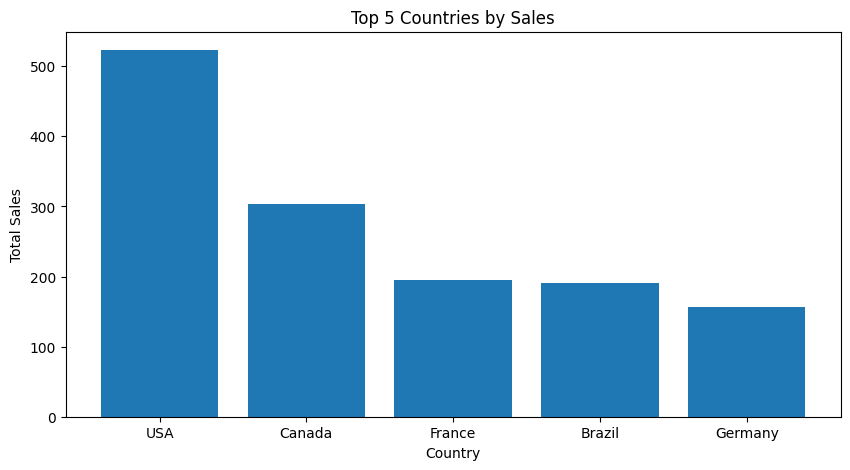

In [104]:
from langchain.agents import initialize_agent  # 从 langchain 库导入相关模块
from langchain.agents import AgentType

import os  # 导入 os 模块，用于操作环境变量
os.environ["GOOGLE_API_KEY"]  # 设置 Google API 密钥，需要替换为您的实际密钥

from langchain_google_genai import GoogleGenerativeAI  # 从 langchain_google_genai 库导入 GoogleGenerativeAI

# 初始化语言模型，使用 Google 的 gemini-1.5-pro 模型，并将 temperature 设置为 0
llm = GoogleGenerativeAI(model="gemini-1.5-pro", temperature=0) 

# 初始化一个代理
agent = initialize_agent(
    tools,                                          # 代理可使用的工具列表
    llm,                                           # 使用的语言模型
    agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION,  # 代理类型：结构化聊天零样本反应描述
    verbose=True                                   # 是否打印详细信息
)

# 运行代理并执行以下任务：
agent.run("从 chinook 数据库中提取销售额排名前五的国家/地区，并将其保存为 pandas DataFrame。然后返回一个 matplotlib 条形图，并将输出结果保存到当前工作目录，文件名为 figure1.png")

In [105]:
from langchain_google_genai import ChatGoogleGenerativeAI
# 初始化聊天型语言模型，使用 Google 的 gemini-1.5-pro 模型
model = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    temperature=0,          # 控制生成文本的随机性，0 表示最确定性
    max_tokens=None,       # 生成的最大 token 数量，None 表示没有限制
    timeout=None,          # 请求超时时间，None 表示没有限制
    max_retries=2,         # 最大重试次数
    # 其他参数...
)

# messages = [
#     (
#         "system",
#         "你是翻译专家，擅长将英语翻译成中文。请将用户的英语语句翻译成中文。",
#     ),
#     ("human", "I love playing RPG games."),
# ]
# chat = llm.invoke(messages)
# chat



> Entering new AgentExecutor chain...
Thought: I can use the sql_db_query tool to get the top 5 countries' sales data from the chinook database. And then I can use the python_repl tool to generate a bar chart using matplotlib and save it to a png file.
Action:
```json
{
  "action": "sql_db_query",
  "action_input": "SELECT BillingCountry, SUM(Total) AS TotalSales FROM Invoice GROUP BY BillingCountry ORDER BY TotalSales DESC LIMIT 5"
}
```
Observation: [('USA', 523.06), ('Canada', 303.96), ('France', 195.1), ('Brazil', 190.1), ('Germany', 156.48)]
Thought:Thought: I can now use the data to create the bar chart using matplotlib in the python_repl tool.
Action:
```json
{
  "action": "python_repl",
  "action_input": "import matplotlib.pyplot as plt\ncountries = ['USA', 'Canada', 'France', 'Brazil', 'Germany']\nsales = [523.06, 303.96, 195.1, 190.1, 156.48]\nplt.bar(countries, sales)\nplt.xlabel('Country')\nplt.ylabel('Total Sales')\nplt.title('Top 5 Countries by Sales')\nplt.savefig('fig

'OK. I have generated a bar chart of the top 5 countries by sales from the chinook database. The chart is saved as figure2.png in the current working directory.'

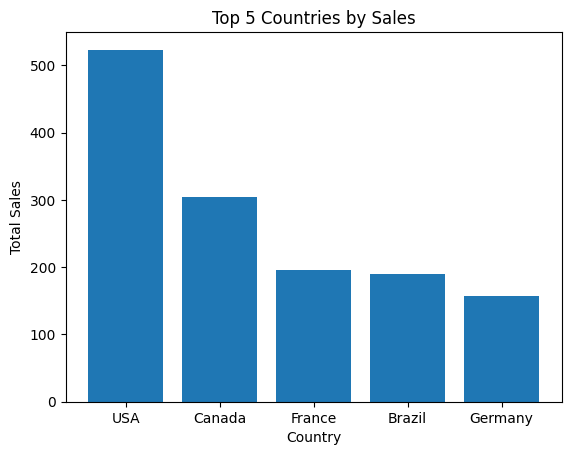

In [107]:
# 初始化一个代理
agent = initialize_agent(
    tools,                                          # 代理可使用的工具列表
    model,                                         # 使用的语言模型
    agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION,  # 代理类型：结构化聊天零样本反应描述
    verbose=True                                   # 是否打印详细信息
)

# 运行代理并执行以下任务：
agent.run("从 chinook 数据库中提取销售额排名前五的国家/地区数据，然后返回一个 matplotlib 条形图，并将输出结果保存到当前工作目录，文件名为 figure2.png")

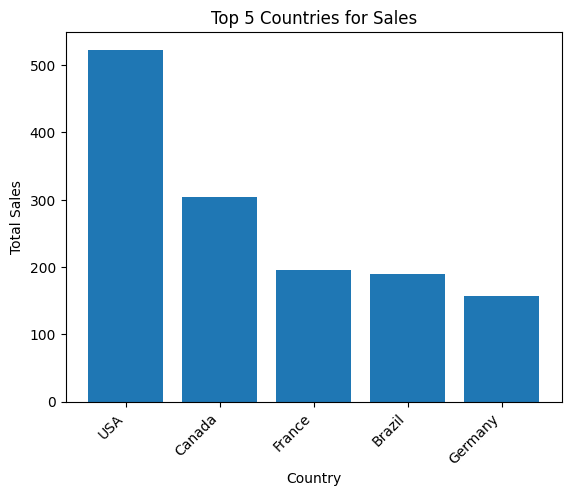

In [64]:
import sqlite3  # 导入 sqlite3 库，用于与 SQLite 数据库交互
import matplotlib.pyplot as plt  # 导入 matplotlib.pyplot 库，用于创建图表

# 连接到 Chinook 数据库
conn = sqlite3.connect('chinook.db')  # 创建一个数据库连接对象
cursor = conn.cursor()  # 创建一个游标对象，用于执行 SQL 查询

# SQL 查询语句，用于获取销售额排名前五的国家/地区
query = """
SELECT BillingCountry, SUM(Total) AS TotalSales  -- 选择账单地址国家和总销售额
FROM Invoice -- 从 Invoice 表中查询
GROUP BY BillingCountry  -- 按国家分组
ORDER BY TotalSales DESC  -- 按总销售额降序排列
LIMIT 5;  -- 限制结果为前五个
"""

# 执行查询并获取结果
cursor.execute(query)  # 执行 SQL 查询
results = cursor.fetchall()  # 获取所有查询结果

# 从结果中提取国家名称和销售额
countries = [row[0] for row in results]  # 提取国家名称列表
sales = [row[1] for row in results]  # 提取销售额列表

# 创建条形图
plt.bar(countries, sales)  # 使用国家和销售额数据创建条形图

# 添加标签和标题
plt.xlabel('Country')  # 设置 x 轴标签
plt.ylabel('Total Sales')  # 设置 y 轴标签
plt.title('Top 5 Countries for Sales')  # 设置图表标题

# 旋转 x 轴标签以提高可读性
plt.xticks(rotation=45, ha='right')  # 将 x 轴标签旋转 45 度，并右对齐

# 将图表保存为 PNG 文件
plt.savefig('figure.png')  # 将图表保存为名为 "figure.png" 的 PNG 文件

# 显示图表 (可选)
plt.show()  # 在单独的窗口中显示图表 (可选)

# 关闭数据库连接
conn.close()  # 关闭数据库连接，释放资源

In [110]:
# print(agent_executor.agent.llm_chain.prompt.template)
# print(mrkl.agent.llm_chain.prompt)
# mrkl.agent.llm_chain.prompt.messages

In [112]:
prompt_prefix = """ 
##说明：
你是一个代理，旨在与 SQL 数据库交互，使用 matplotlib 生成图表并将它们保存在当前工作目录中。

作为最终答案，返回用户问题的答案以及 matplotlib 图表。

作为最终答案的一部分，**始终**包含对如何获得最终答案的解释，包括您运行的 SQL 查询。将解释和 SQL 查询包含在以“解释：”开头的部分中。

作为最终答案的一部分，**始终**在输出中包含 matplotlib 图表。您可以决定图表类型。如果在输出中生成图表，请使用 .png 扩展名将输出图表保存在当前工作目录中。给它一个相关的名字。

**不要**对数据库进行任何 DML 语句（插入、更新、删除、删除等）操作。

如果问题看起来与数据库无关，只需返回“我不知道”作为答案。

您可以使用以下工具：

"""

prompt_format_instructions = """ 

使用以下格式：

问题：问题在此处
SQLQuery：要运行的 SQL 查询
SQLResult：SQLQuery 的结果
答案：最终答案在此处
解释：

"""



> Entering new AgentExecutor chain...
Thought: I need to query the database to get the top 5 countries by sales, then use python code to plot the bar chart and save it.

Action:
```json
{
  "action": "sql_db_query",
  "action_input": "SELECT BillingCountry, SUM(Total) AS TotalSales FROM Invoice GROUP BY BillingCountry ORDER BY TotalSales DESC LIMIT 5;"
}
```
Observation: [('USA', 523.06), ('Canada', 303.96), ('France', 195.1), ('Brazil', 190.1), ('Germany', 156.48)]
Thought:Thought: I have the data, now I need to generate the plot using matplotlib.
Action:
```json
{
  "action": "python_repl",
  "action_input": "import matplotlib.pyplot as plt\ncountries = ['USA', 'Canada', 'France', 'Brazil', 'Germany']\nsales = [523.06, 303.96, 195.1, 190.1, 156.48]\nplt.bar(countries, sales)\nplt.xlabel('Country')\nplt.ylabel('Total Sales')\nplt.title('Top 5 Countries by Sales')\nplt.savefig('figure3.png')\nprint('Plot saved to figure3.png')"
}
```
Observation: Plot saved to figure3.png

Thought:Th

{'input': '从 chinook 数据库中提取销售额排名前五的国家/地区数据，并使用 matplotlib 生成一个条形图。最后将输出结果保存到当前工作目录，文件名为 figure3.png',
 'output': 'Ok, I have extracted the data, generated the bar chart, and saved it as figure3.png in the current working directory.'}

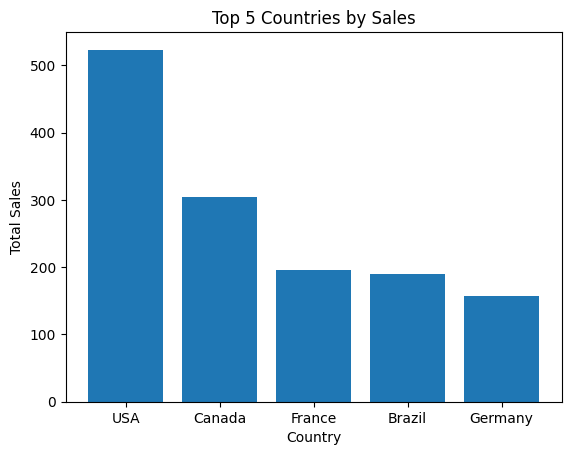

In [115]:
agent.invoke("从 chinook 数据库中提取销售额排名前五的国家/地区数据，并使用 matplotlib 生成一个条形图。最后将输出结果保存到当前工作目录，文件名为 figure3.png")

In [116]:
# 定义提示词前缀
PREFIX = """
尽你所能回答以下问题。
您可以使用以下工具：

"""

# 定义格式说明
FORMAT_INSTRUCTIONS = """
使用以下格式：

问题：您必须回答的输入问题
思考：您应该始终考虑做什么
行动：要采取的行动，应该是 [{tool_names}] 中的一个
行动输入：行动的输入
观察：行动的结果
...（此思考/行动/行动输入/观察可以重复 N 次）
思考：我现在知道最终答案了
最终答案：对原始输入问题的最终答案
"""

# 定义提示词后缀
SUFFIX = """
开始！

问题：{input}
思考：{agent_scratchpad}
"""

# 初始化代理
agent = initialize_agent(
    tools,                                                   # 代理可使用的工具列表
    model,                                                  # 使用的语言模型
    agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION,  # 代理类型：结构化聊天零样本反应描述
    verbose=True,                                             # 是否打印详细信息
    agent_kwargs={                                          # 代理的额外参数
        'prefix': PREFIX,                                      # 提示词前缀
        'format_instructions': FORMAT_INSTRUCTIONS,          # 格式说明
        'suffix': SUFFIX                                       # 提示词后缀
    }
)



> Entering new AgentExecutor chain...
Thought: I need to break this down into steps:
1. Get the top 5 countries by sales from the database.
2. Format the data for matplotlib.
3. Create a bar chart using matplotlib.
4. Save the chart to a file named figure4.png.

Action:
```json
{
  "action": "sql_db_query",
  "action_input": "SELECT BillingCountry, SUM(Total) AS TotalSales FROM Invoice GROUP BY BillingCountry ORDER BY TotalSales DESC LIMIT 5"
}
```
Observation: [('USA', 523.06), ('Canada', 303.96), ('France', 195.1), ('Brazil', 190.1), ('Germany', 156.48)]
Thought:```json
{
  "action": "python_repl",
  "action_input": "import matplotlib.pyplot as plt\n\n# 数据\ncountries = ['USA', 'Canada', 'France', 'Brazil', 'Germany']\nsales = [523.06, 303.96, 195.1, 190.1, 156.48]\n\n# 创建条形图\nplt.bar(countries, sales)\n\n# 添加标题和标签\nplt.title('Top 5 Countries by Sales')\nplt.xlabel('Country')\nplt.ylabel('Total Sales')\n\n# 保存图表\nplt.savefig('figure4.png')"
}
```
Observation: 
Thought:```python
impo

{'input': '从 chinook 数据库中提取销售额排名前五的国家/地区数据，并使用 matplotlib 生成一个条形图。最后将输出结果保存到当前工作目录，文件名为 figure4.png',
 'output': '```python\nimport sqlite3\nimport matplotlib.pyplot as plt\n\n# 连接到数据库\nconn = sqlite3.connect(\'chinook.db\')\ncursor = conn.cursor()\n\n# 执行 SQL 查询\ncursor.execute("""\nSELECT BillingCountry, SUM(Total) AS TotalSales \nFROM Invoice \nGROUP BY BillingCountry \nORDER BY TotalSales DESC \nLIMIT 5\n""")\n\n# 获取查询结果\ntop_countries = cursor.fetchall()\n\n# 关闭数据库连接\nconn.close()\n\n# 提取国家和销售额数据\ncountries = [row[0] for row in top_countries]\nsales = [row[1] for row in top_countries]\n\n# 创建条形图\nplt.bar(countries, sales)\n\n# 添加标题和标签\nplt.title(\'Top 5 Countries by Sales\')\nplt.xlabel(\'Country\')\nplt.ylabel(\'Total Sales\')\n\n# 保存图表\nplt.savefig(\'figure4.png\')\n```\n\n这段代码首先连接到 `chinook.db` 数据库，然后执行 SQL 查询以获取销售额排名前五的国家/地区数据。 接下来，它会提取国家/地区和销售额数据，并使用 matplotlib 创建条形图。 最后，代码将图表保存到名为 `figure4.png` 的文件中。 \n'}

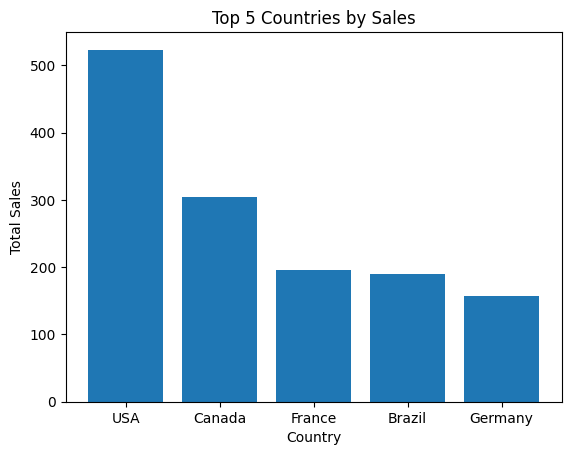

In [117]:
agent.invoke("从 chinook 数据库中提取销售额排名前五的国家/地区数据，并使用 matplotlib 生成一个条形图。最后将输出结果保存到当前工作目录，文件名为 figure4.png")

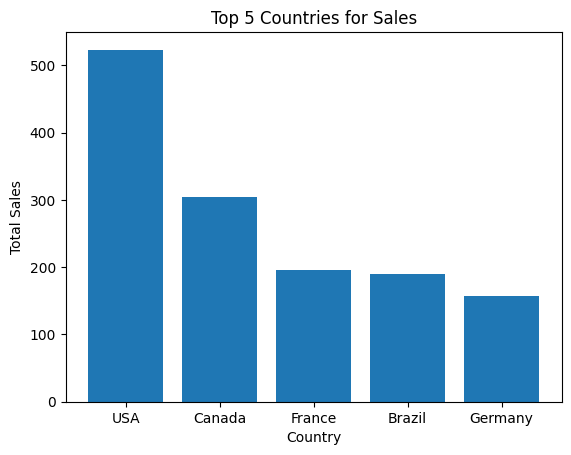

In [71]:
import matplotlib.pyplot as plt

countries = ['USA', 'Canada', 'France', 'Brazil', 'Germany']
sales = [523.06, 303.96, 195.1, 190.1, 156.48]

plt.bar(countries, sales)
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Top 5 Countries for Sales')
plt.show()